<a href="https://colab.research.google.com/github/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Thesis_04_Leukocyte_elastase_ML_Random_Forest_SVM_implementattion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import libraries**

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **2. Load the data set**

In [24]:
! wget https://github.com/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Data/Leukocyte_elastase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-09-28 14:55:50--  https://github.com/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Data/Leukocyte_elastase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Leukocyte_elastase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’

Leukocyte_elastase_     [ <=>                ] 139.34K  --.-KB/s    in 0.05s   

2022-09-28 14:55:50 (2.69 MB/s) - ‘Leukocyte_elastase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’ saved [142683]



In [3]:
df = pd.read_csv('/content/Leukocyte_elastase_09_bioactivity_data_2class_binary_active_inactive_pubchem_fp.csv')

In [4]:
df


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,target
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1800,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1801,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1802,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **3. Input features**
The ***Leukocyte Elastase*** data set contains 881 input features and 1 output variable (target values).

### **3.1. Input features**

In [5]:
X = df.drop('target', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1800,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1801,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1802,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.target
Y

0       0
1       1
2       1
3       1
4       0
       ..
1799    0
1800    0
1801    0
1802    0
1803    0
Name: target, Length: 1804, dtype: int64

In [7]:
df["target"].value_counts()

1    1395
0     409
Name: target, dtype: int64

### **3.3. Let's examine the data dimension**

In [8]:
X.shape

(1804, 881)

In [9]:
Y.shape

(1804,)

### **3.4. Remove low variance features**

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [11]:
X.shape

(1804, 151)

## **4. Data split (80/20 ratio)**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((1443, 151), (1443,))

In [14]:
X_test.shape, Y_test.shape

((361, 151), (361,))

## **5. Building a Classification Model using Random Forest**

In [24]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE RF MODEL: ", metrics.accuracy_score(Y_test, Y_pred))



ACCURACY OF THE RF MODEL:  0.9030470914127424


In [ ]:
clf.feature_importances_

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_pred,Y_test))

[[ 61  13]
 [ 22 265]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.73      0.82      0.78        74
           1       0.95      0.92      0.94       287

    accuracy                           0.90       361
   macro avg       0.84      0.87      0.86       361
weighted avg       0.91      0.90      0.91       361



## **5. Building a Classification Model using Support Vector Machine**

In [37]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1,probability=True)
svc_model.fit(X_train, Y_train)

prediction = svc_model .predict(X_test)
from sklearn import metrics
print()
# check the accuracy on the training set
#print(svc_model.score(X_train, Y_train))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_pred, Y_test))




ACCURACY OF THE MODEL:  0.9030470914127424


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_pred,Y_test))

[[ 61  16]
 [ 22 262]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.73      0.82      0.78        74
           1       0.95      0.92      0.94       287

    accuracy                           0.90       361
   macro avg       0.84      0.87      0.86       361
weighted avg       0.91      0.90      0.91       361



## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

## **Prediction probabilities** 

In [38]:
r_probs = [0 for _ in range(len(Y_test))]
clf_probs = clf.predict_proba(X_test)
svc_model_probs = svc_model.predict_proba(X_test)


In [39]:
clf_probs = clf_probs[:, 1]
svc_model_probs = svc_model_probs[:, 1]

In [40]:
r_auc = roc_auc_score(Y_test, r_probs)
clf_auc = roc_auc_score(Y_test, clf_probs)
svc_model_auc = roc_auc_score(Y_test, svc_model_probs)


In [41]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (clf_auc))
print('Support Vector Machine: AUROC = %.3f' % (svc_model_auc))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.951
Support Vector Machine: AUROC = 0.953


In [42]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test,clf_probs)
svm_fpr, svm_tpr, _ = roc_curve(Y_test,svc_model_probs)


In [43]:
import matplotlib.pyplot as plt

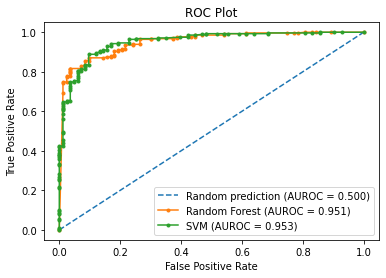

In [44]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % clf_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svc_model_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()